In [1]:
from pdfminer.high_level import extract_text

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

### LaTeX text

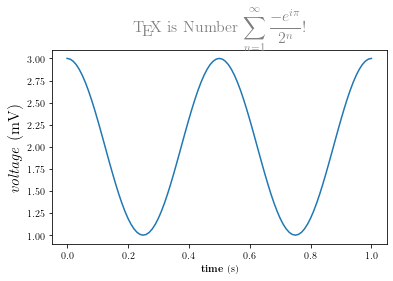

In [4]:
"""
Demo of TeX rendering.

You can use TeX to render all of your matplotlib text if the rc
parameter text.usetex is set.  This works currently on the agg and ps
backends, and requires that you have tex and the other dependencies
described at http://matplotlib.sf.net/matplotlib.texmanager.html
properly installed on your system.  The first time you run a script
you will see a lot of output from tex and associated tools.  The next
time, the run may be silent, as a lot of the information is cached in
~/.tex.cache

"""
import numpy as np
import matplotlib.pyplot as plt


# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
plt.title(r"\TeX\ is Number "
          r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
          fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)

plt.show()

# Full Program

In [5]:
wanda = extract_text('wanda.pdf')

In [6]:
adilson = extract_text('adilson.pdf')

In [7]:
fernando = extract_text('fernando.pdf')

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer


In [9]:
stopwords = set(stopwords.words('portuguese') + list(punctuation)+ [ "...","x", "•", "●", "–", "\uf0b7", "______________________________________________","“","”"  ])

In [10]:
%matplotlib inline

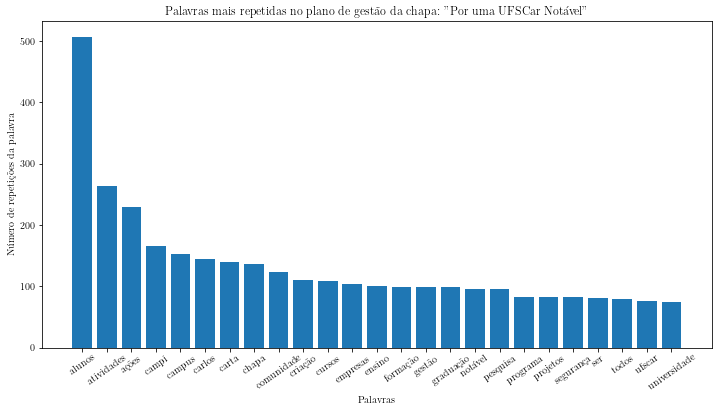

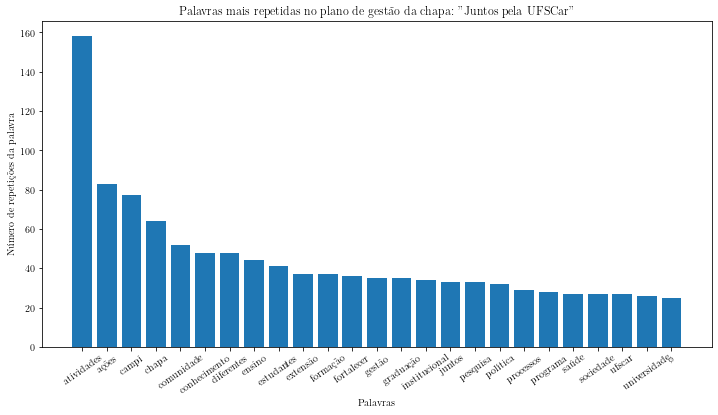

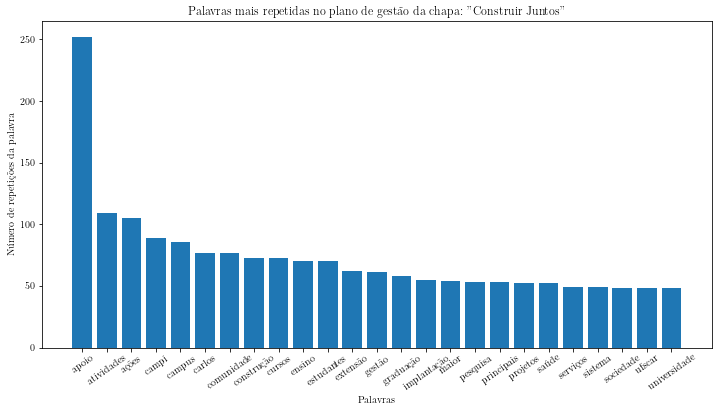

In [11]:
planosdegestao = [fernando, adilson, wanda]
nomes  = {"Por uma UFSCar Notável":0, "Juntos pela UFSCar":0 ,"Construir Juntos":0 }
fig1, ax1 = plt.subplots( figsize=(12,6))
fig2, ax2 = plt.subplots( figsize=(12,6))
fig3, ax3 = plt.subplots( figsize=(12,6))

axis = [ax1,ax2,ax3]
figs = [fig1, fig2,fig3]
for i in range(len(planosdegestao)):
    title = list(nomes.keys())[i]
    plano = planosdegestao[i]
    planolower = word_tokenize(plano.lower())
    planosemstopwords = [x for x in planolower if x not in stopwords]

    planomostcommon = np.array(FreqDist(planosemstopwords).most_common());
    dtf = pd.DataFrame(data=planomostcommon, columns=["Palavras", "Valores"])
    nomes[title] = dtf
    
   
    
    
    dtf["Valores"] = pd.to_numeric(dtf["Valores"])

    dtf = dtf.head(25)
    labels, counts = np.unique(dtf["Palavras"],return_counts=True)
    
    ticks = range(len(counts))
    
    axis[i].bar(ticks,dtf["Valores"], align='center');
    #axis[i].xticks(ticks, labels, rotation=35);
    axis[i].set_title("Palavras mais repetidas no plano de gestão da chapa: \""+ title+ "\"")
    axis[i].set_xticks(ticks, minor=False,)
    axis[i].set_xticklabels(labels,rotation=35, fontdict=None, minor=False)
    
    axis[i].set_xlabel(r'Palavras')
    axis[i].set_ylabel("Número de repetições da palavra")
 

    
    figs[i].savefig(title, dpi=400, bbox_inches = 'tight')


In [12]:
totalchp1 = nomes["Por uma UFSCar Notável"]["Valores"].sum()
totalchp2 = nomes["Juntos pela UFSCar"]["Valores"].sum()
totalchp3 = nomes["Construir Juntos"]["Valores"].sum()

In [13]:
ch1 = "Por uma UFSCar Notável"
ch2 = "Juntos pela UFSCar"
ch3 = "Construir Juntos"

In [14]:
def repeticaodeumapalavra(chapa, palavra, individual = True):
    totalchpi = nomes[chapa]["Valores"].sum()
    try:
        indexdepalavra = nomes[chapa].groupby("Palavras").get_group(palavra).index
        indexdepalavra = indexdepalavra[0]


        valor = nomes[chapa]["Valores"][indexdepalavra]
    except:
        indexdepalavra = 0
        valor = 0
        
        
    filaparaimprimir = [chapa, palavra,  np.float(indexdepalavra), np.float(valor/totalchpi),np.float(valor)]
    columnasnomes = ["Chapa", "Palavra", "Posiçao", "Densidade", "Repetições"]
    #dataframe = pd.DataFrame.from_records(filaparaimprimir, columns = columnasnomes)
    dataframe = pd.DataFrame(data = [filaparaimprimir], columns= columnasnomes)
    if individual == True:
        return (dataframe)
    else: 
        return filaparaimprimir

def procurarpalavraparatodasaschapas(palavra):
    chapas = [ch1,ch2,ch3]
    columnasnomes = ["Chapa", "Palavra", "Posiçao", "Densidade", "Repetições"]
    arr1 = np.array(repeticaodeumapalavra(ch1, palavra, False))
    arr2 = np.array(repeticaodeumapalavra(ch2, palavra, False))
    arr3 = np.array(repeticaodeumapalavra(ch3, palavra, False))

    a = [arr1,arr2,arr3]
    dataframe = pd.DataFrame(data = a, columns= columnasnomes)

    return(dataframe)

In [15]:
procurarpalavraparatodasaschapas("ufscar")

,Chapa,Palavra,Posiçao,Densidade,Repetições
0,Por uma UFSCar Notável,ufscar,0.0,0.016772528781262407,507.0
1,Juntos pela UFSCar,ufscar,0.0,0.025103272958373054,158.0
2,Construir Juntos,ufscar,0.0,0.016359387172163075,252.0


In [16]:
def grafecompararsin(palavras, parametro, ax = False):    
    data = []
    chapas = [ch1,ch2,ch3]
    labels = palavras
    for palavra in labels:
        try:
            dfdesinonimos = pd.DataFrame( columns = ["Chapa", "Palavra", "Posiçao", "Densidade", "Repetições"])
            for sinonimo in palavra:        
                sinonimodf = procurarpalavraparatodasaschapas(sinonimo)
                dfdesinonimos.append(sinonimodf, ignore_index = True)
            statsparasinonimo = dfsinonimos[parametro]
            for i in range(len(statsparapalabra)):
                statsparasinonimo[i] = np.float(statsparapalabra[i])
                data.append(statsparasinonimo)
        except Exception as e: print(e)
            
    dim = len(data[0])
    w = 0.75
    dimw = w / dim

    if ax == False:
        fig, ax = plt.subplots(figsize=(7,7))
        plt.title(r"""  Densidade de palavras no plano de gestão  \newline   \small{Densidade de palavra = Palavras seleccionada/Palavras Totais }""")
    
    x = np.arange(len(data))
    for i in range(len(data[0])):
        y = [d[i] for d in data]
        b = ax.bar(x + i * dimw, y, dimw, bottom=0.001, label = chapas[i])

    ax.set_xticks(x + dimw / 2)
    ax.set_xticklabels(map(str, labels))

    
    ax.set_xlabel(r'Palavras')
    ax.set_ylabel(str(parametro))
    ax.legend()

    plt.savefig(palavras[0], dpi=200, bbox_inches = 'tight')
    #plt.show()

In [17]:
def grafecomparar(palavras, parametro, ax = False):    
    data = []
    chapas = [ch1,ch2,ch3]
    labels = palavras
    for palavra in labels:
        palavradf = procurarpalavraparatodasaschapas(palavra)
        statsparapalabra = palavradf[parametro]
        for i in range(len(statsparapalabra)):
            statsparapalabra[i] = np.float(statsparapalabra[i])
        
        data.append(statsparapalabra)
    dim = len(data[0])
    w = 0.75
    dimw = w / dim

    if ax == False:
        fig, ax = plt.subplots(figsize=(7,7))
        plt.title(r"""  Densidade de palavras no plano de gestão  \newline   \small{Densidade de palavra = Palavras seleccionada/Palavras Totais }""")
    
    x = np.arange(len(data))
    for i in range(len(data[0])):
        y = [d[i] for d in data]
        b = ax.bar(x + i * dimw, y, dimw, bottom=0.001, label = chapas[i])

    ax.set_xticks(x + dimw / 2)
    ax.set_xticklabels(map(str, labels))

    
    ax.set_xlabel(r'Palavras')
    ax.set_ylabel(str(parametro))
    ax.legend()

    plt.savefig(palavras[0], dpi=200)
    #plt.show()

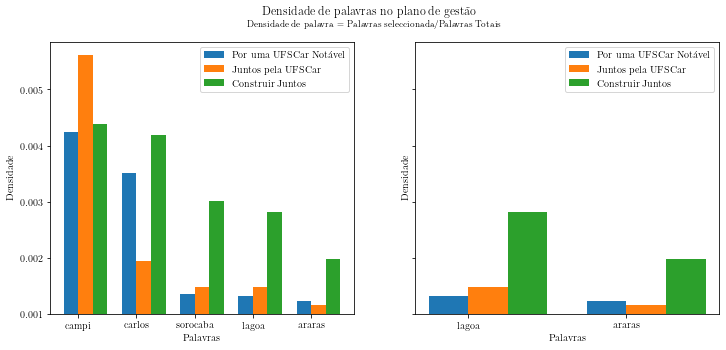

In [18]:
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
fig.suptitle(r"""  Densidade de palavras no plano de gestão  \newline   \small{Densidade de palavra = Palavras seleccionada/Palavras Totais }""")

grafecomparar(["campi", "carlos","sorocaba" ,"lagoa", "araras"],"Densidade",  ax= axs[0] )
grafecomparar(["lagoa", "araras"],"Densidade",  ax= axs[1])


In [19]:
def grafecompararsin(palavras, parametro, ax = False):    
    data = []
    chapas = [ch1,ch2,ch3]
    labels = palavras
    for palavra in labels:
        try:
            dfdesinonimos = pd.DataFrame( columns = ["Chapa", "Palavra", "Posiçao", "Densidade", "Repetições"])
            if type(palavra) == list: 
                for sinonimo in palavra:
                    sinonimodf = procurarpalavraparatodasaschapas(sinonimo)
                    dfdesinonimos = dfdesinonimos.append(sinonimodf, ignore_index = True)
                    dfdesinonimos[parametro] = pd.to_numeric(dfdesinonimos[parametro])
                #print(dfdesinonimos)
                statsparasinonimo = dfdesinonimos[parametro]
                
                #print("Separado", dfdesinonimos[parametro])
                dfdesinonimos['a_bsum'] = dfdesinonimos.groupby('Chapa')[parametro].transform(sum)
                statsparasinonimo = dfdesinonimos["a_bsum"][0:3]
               
                #print("Sumado",statsparasinonimo)

                data.append(statsparasinonimo)
            else: 
                palavradf = procurarpalavraparatodasaschapas(palavra)
                statsparapalabra = palavradf[parametro]
                for i in range(len(statsparapalabra)):
                    statsparapalabra[i] = np.float(statsparapalabra[i])
                data.append(statsparapalabra)
        except Exception as e: 
            print(e)
            
            
            
    #print("DAAT",data)
    dim = len(data[0])
    w = 0.75
    dimw = w / dim

    if ax == False:
        fig, ax = plt.subplots(figsize=(10,8))
        plt.title(r"""  Densidade de palavras no plano de gestão  \newline   \small{Densidade de palavra = Palavras seleccionada/Palavras Totais }""")
    
    x = np.arange(len(data))
    for i in range(len(data[0])):
        y = [d[i] for d in data]
        #print(y)
        b = ax.bar(x + i * dimw, y, dimw, bottom=0.001, label = chapas[i])

    ax.set_xticks(x + dimw / 2)
    
    nwlabel = []
    for sinonimos in labels:
        nwlabel.append((sinonimos[0])) 
    ax.set_xticklabels(map(str,nwlabel))
    
    
    ax.set_xlabel(r'Palavras')
    ax.set_ylabel(str(parametro))
    ax.legend()

    plt.savefig(palavras[0][0], dpi=200, bbox_inches = 'tight')
    #plt.show()

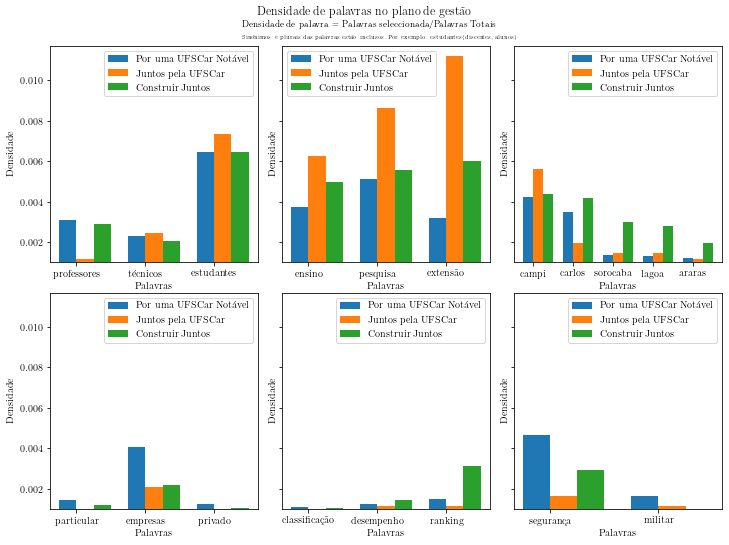

In [34]:
fig, axs = plt.subplots(2,3, figsize=(10,7), sharey=True)
fig.suptitle(r"""  Densidade de palavras no plano de gestão  \newline   \small{Densidade de palavra = Palavras seleccionada/Palavras Totais \newline \tiny{Sinônimos e plurais das palavras estão inclusos. Por exemplo: estudantes(discentes, alunos)}  }""", y = 1.05)
fig.tight_layout()


grafecompararsin([["professores", "professor"], ["técnicos", "ta", "tas", "técnico"], ["estudantes","discente", "discentes", "aluno", "alunos"]],"Densidade",ax = axs[0][0])
grafecompararsin([["ensino"], ["pesquisa"], ["extensão"]],"Densidade", ax = axs[0][1])
grafecompararsin([["campi"], ["carlos"], ["sorocaba"], ["lagoa"], ["araras"]],"Densidade",ax = axs[0][2])
grafecompararsin([["classificação"], ["desempenho"], ["ranking", "rankings", "índice", "índices"]],"Densidade", ax = axs[1][1])
grafecompararsin([["particular", "particulares"], ["empresas","empresa" ], ["privado", "privados"] ], "Densidade", ax = axs[1][0])
grafecompararsin([["segurança"],["militar","militares"] ],"Densidade", ax = axs[1][2])



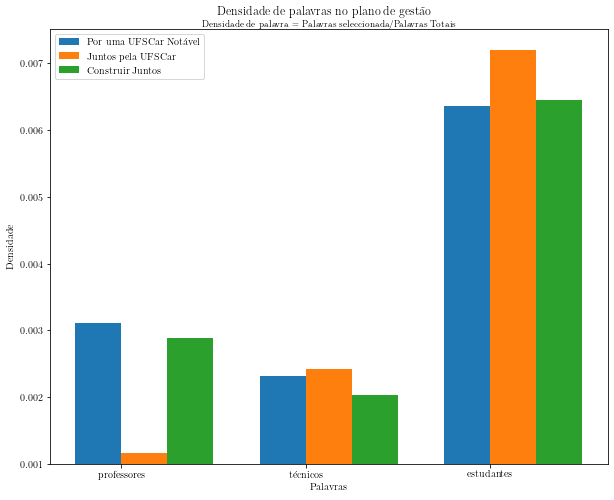

In [20]:
grafecompararsin([["professores", "professor"], ["técnicos", "ta", "tas", "técnico"], ["estudantes", "discentes", "aluno", "alunos"]],"Densidade")

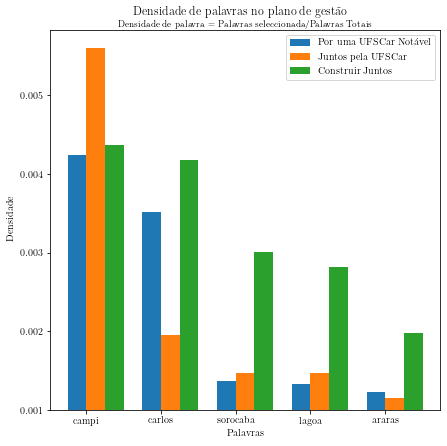

In [21]:
grafecomparar(["campi", "carlos","sorocaba" ,"lagoa", "araras"],"Densidade")

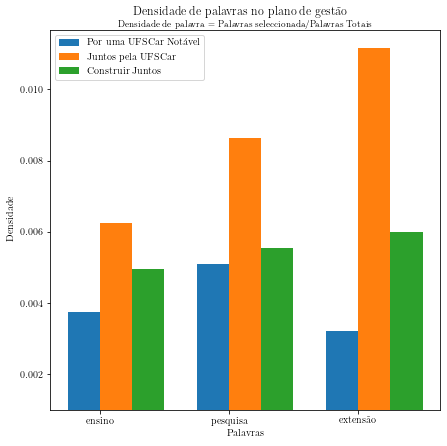

In [22]:
grafecomparar(["ensino", "pesquisa", "extensão" ],"Densidade")

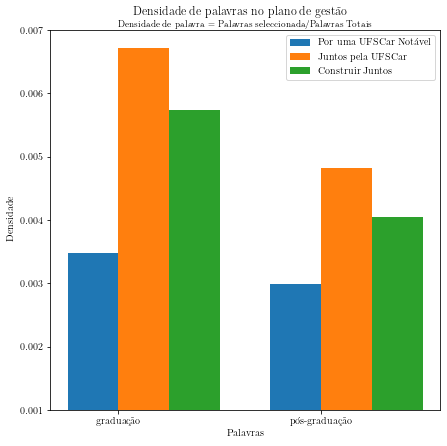

In [23]:
grafecomparar(["graduação", "pós-graduação" ],"Densidade")

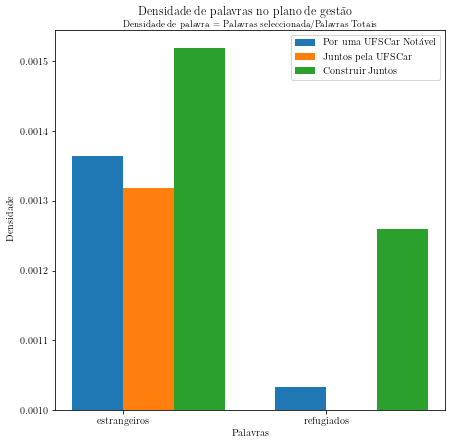

In [24]:
grafecomparar(["estrangeiros" ,"refugiados" ],"Densidade")

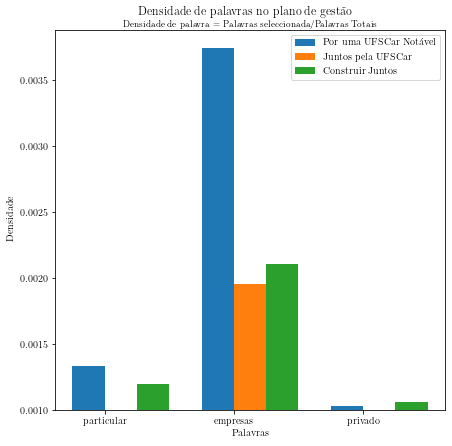

In [25]:
grafecomparar(["particular", "empresas", "privado" ],"Densidade")

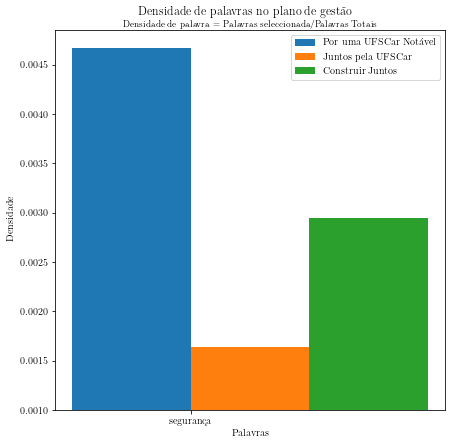

In [26]:
grafecomparar(["segurança" ],"Densidade")

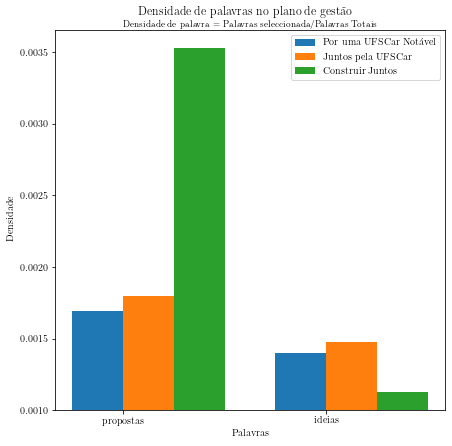

In [27]:
grafecomparar(["propostas", "ideias"],"Densidade")

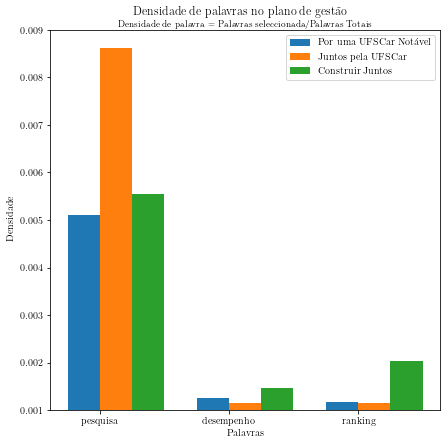

In [28]:
grafecomparar(["pesquisa", "desempenho", "ranking"],"Densidade")

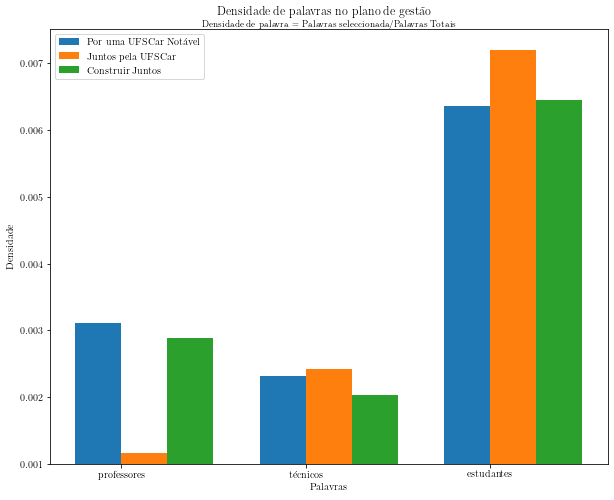

In [29]:
grafecompararsin([["professores", "professor"], ["técnicos", "ta", "tas", "técnico"], ["estudantes", "discentes", "aluno", "alunos"]],"Densidade")

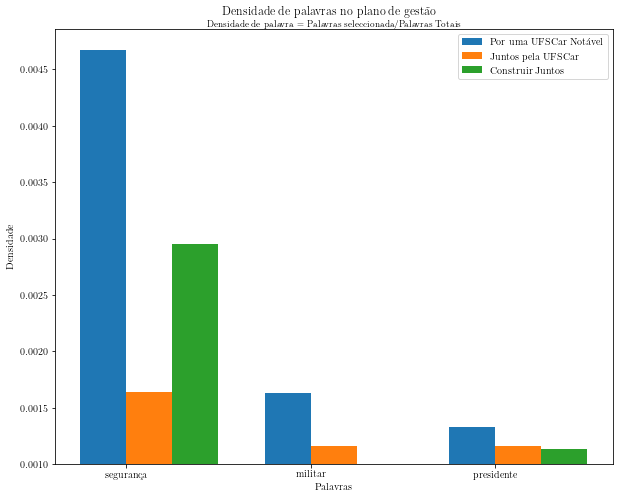

In [31]:
grafecompararsin([["segurança"],["militar","militares"], ["presidente"] ],"Densidade")

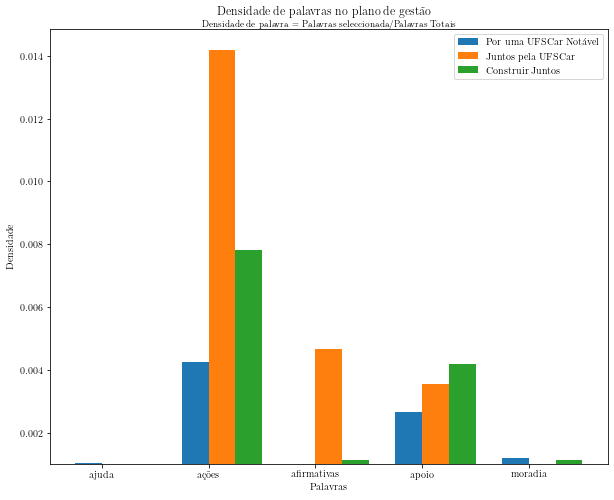

In [32]:
grafecompararsin([["ajuda"],["ações"],["afirmativas"] ,["apoio"],["moradia"]],"Densidade")